## Streambatch NDVI API Tutorial

The Streambatch API delivers time series NDVI data as a pandas DataFrame.

The user specifies the locations they want NDVI data for. (single points or polygons)

The Streambatch API is asynchronous. For a single location, it usually takes several minutes to process one request.  However, multiple locations are processed in parallel, so 10 or 100 or 1000 locations are also processed in minutes.
To begin, install the streambatch package:

`pip install streambatch`

Then execute the code below.

In [1]:
from streambatch import StreambatchConnection

### NDVI for a single point

In [3]:
point = [3.940705,49.345238] # longitude, latitude

# Connect to the Streambatch API
api_key = YOUR_API_KEY
connection = StreambatchConnection(api_key=api_key)

# request an NDVI time for the point
query_id = connection.request_ndvi(     points=[point],             # a list of points         
                                        start_date='2019-01-01',    # optional, defaults to 2013-01-01
                                        end_date='2019-12-31',      # optional, defaults to today
                                        aggregation='median')       # optional, defaults to median

Query ID: d7faccea-8fc5-4fa1-89f2-45b6e8dfdad6
Number of points: 1
Start date: 2019-01-01
End date: 2019-12-31
Aggregation: median


In [38]:
# get_data() will block until the data is ready
df = connection.get_data(query_id)
df.head()

,time,location,polygon,ndvi
0,2013-04-25,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.215576
1,2013-04-26,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.216830
2,2013-04-27,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.218084
3,2013-04-28,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.219338
4,2013-04-29,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.220593


### NDVI for a polygon

In [4]:
some_polygon = {
    'type': 'Polygon',
    'coordinates': 
        [[[-94.4545917478666, 41.9792090154671], 
        [-94.4545448033213, 41.9757220431519], 
        [-94.4450066084548, 41.9757090969481], 
        [-94.4450437851949, 41.9792826686391], 
        [-94.4545917478666, 41.9792090154671]]]
}

query_id = connection.request_ndvi(polygons=[some_polygon]) # polygons is a list of polygons

Query ID: 4c639df4-2b3d-4aa3-8c64-c4322ba058dd
Number of polygons: 1
Start date: 2013-01-01
End date: 2023-09-03
Aggregation: median


In [5]:
# If you want you can manually check if the data is ready
import time
print('Waiting for data...',end="",flush=True)
while not connection.query_done(query_id):
    time.sleep(8)
    print(".",end="",flush=True)
print("done.")

df = connection.get_data(query_id)
df.head()

Waiting for data...................done.



,time,location,polygon,ndvi
0,2013-04-25,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.215576
1,2013-04-26,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.216830
2,2013-04-27,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.218084
3,2013-04-28,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.219338
4,2013-04-29,0,"POLYGON ((-94.4545917478666 41.9792090154671, ...",0.220593


## Plotted

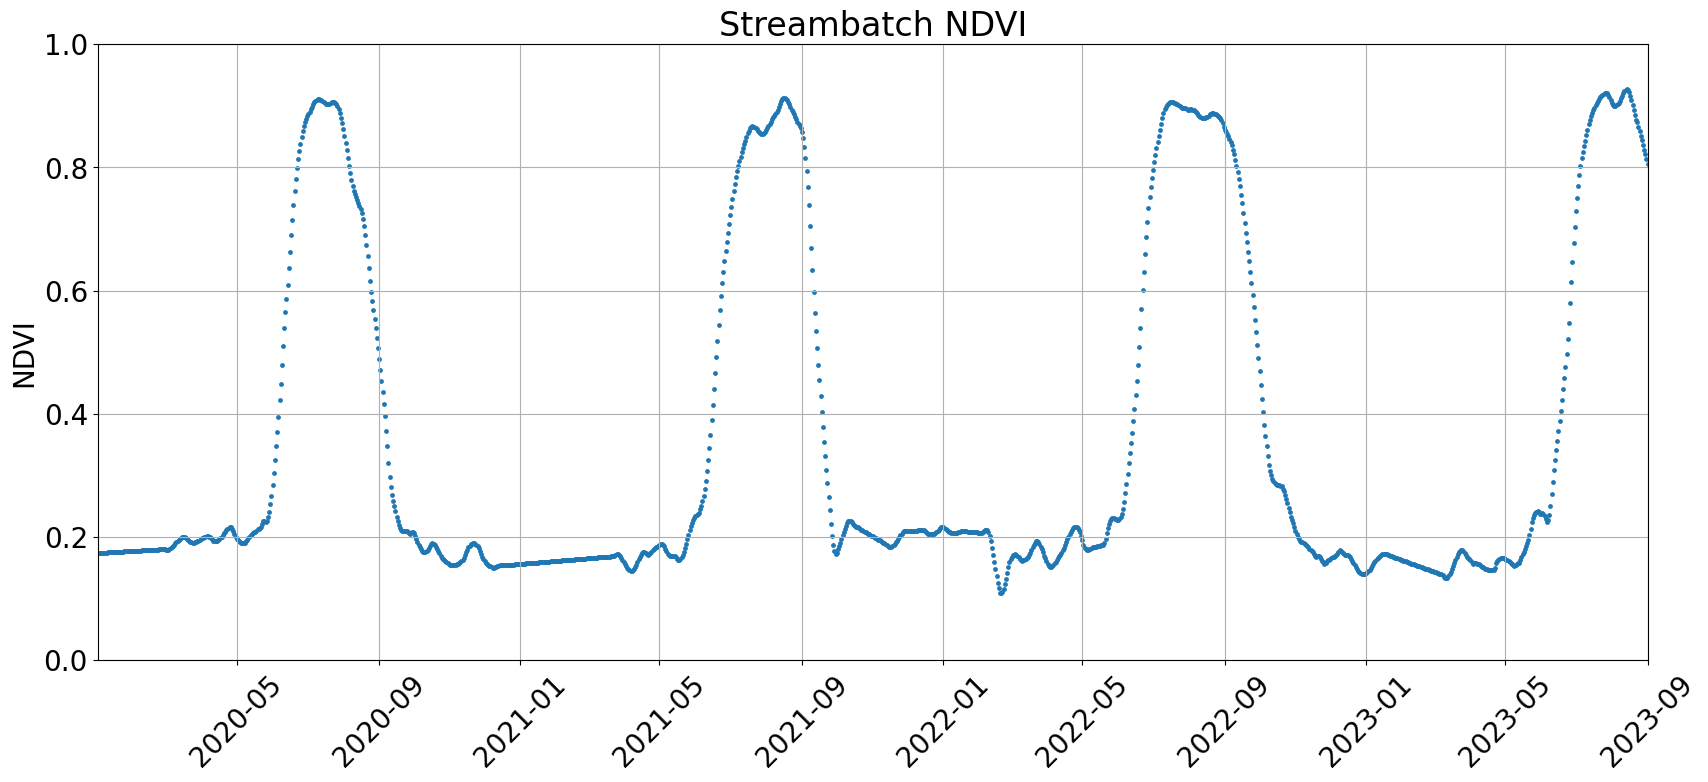

In [37]:
# Plot the data
import matplotlib.pyplot as plt

df1 = df[df['time']>'2020-01-01']
plt.rc('font', size=20)
plt.scatter(df1['time'],df1['ndvi'],s=6)
plt.gcf().set_size_inches(20, 8)
ax = plt.gca()
ax.margins(0)
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('NDVI')
plt.title('Streambatch NDVI')
plt.show()